In [1]:
from model_opt import Sphere
from algo_GD import SGD
import noise
import numpy as np
import multiprocessing as mproc
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
w_init = np.array([2,-2])
noise_value = np.zeros(2)
var = 50 # iqr 70~80
batchsize = 100
_t_max = 100
noise_data = noise.Gauss(mean=0, sigma=var, dim=2, n=batchsize * _t_max).generate()

algo = SGD(w_init=w_init, t_max=_t_max, a=0.01)
for i in algo:
    f = Sphere(noise_value=noise_value)
    print(f.g_opt(algo.w))
    algo.update(model=f)

[ 4. -4.]
[ 3.92 -3.92]
[ 3.8416 -3.8416]
[ 3.764768 -3.764768]
[ 3.68947264 -3.68947264]
[ 3.61568319 -3.61568319]
[ 3.54336952 -3.54336952]
[ 3.47250213 -3.47250213]
[ 3.40305209 -3.40305209]
[ 3.33499105 -3.33499105]
[ 3.26829123 -3.26829123]
[ 3.2029254 -3.2029254]
[ 3.13886689 -3.13886689]
[ 3.07608956 -3.07608956]
[ 3.01456777 -3.01456777]
[ 2.95427641 -2.95427641]
[ 2.89519088 -2.89519088]
[ 2.83728706 -2.83728706]
[ 2.78054132 -2.78054132]
[ 2.7249305 -2.7249305]
[ 2.67043189 -2.67043189]
[ 2.61702325 -2.61702325]
[ 2.56468278 -2.56468278]
[ 2.51338913 -2.51338913]
[ 2.46312135 -2.46312135]
[ 2.41385892 -2.41385892]
[ 2.36558174 -2.36558174]
[ 2.31827011 -2.31827011]
[ 2.2719047 -2.2719047]
[ 2.22646661 -2.22646661]
[ 2.18193728 -2.18193728]
[ 2.13829853 -2.13829853]
[ 2.09553256 -2.09553256]
[ 2.05362191 -2.05362191]
[ 2.01254947 -2.01254947]
[ 1.97229848 -1.97229848]
[ 1.93285251 -1.93285251]
[ 1.89419546 -1.89419546]
[ 1.85631155 -1.85631155]
[ 1.81918532 -1.81918532]
[ 1.78

In [3]:
f = Sphere()
x = np.arange(-4, 4, 0.1)
y = np.arange(-4, 4, 0.1)
X, Y = np.meshgrid(x, y)
Z = []
for i,j in zip(X,Y):
    for k,l in zip(i,j):
        Z.append(f.f_opt([k,l]))

In [4]:
Z = np.array(Z).reshape(X.shape)

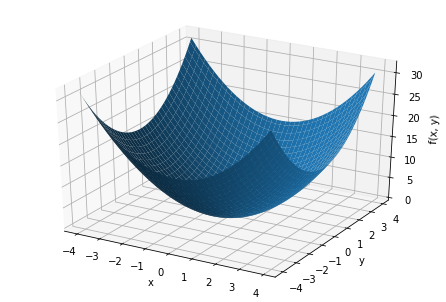

In [5]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")

ax.plot_surface(X,Y , Z)
plt.show()

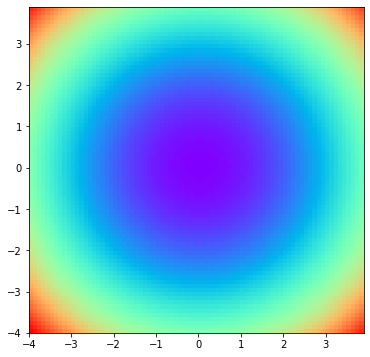

In [6]:
fig, axes = plt.subplots(1,1, figsize=(6,6))
axes.pcolor(X, Y, Z,cmap=plt.cm.rainbow)

In [7]:
np.arange(10,0,-1)

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [8]:

w_init = np.array([1,1])
noise_value = np.zeros(2)
var = 50 # iqr 70~80
batchsize = 100
_t_max = 100
noise_data = noise.Gauss(mean=0, sigma=var, dim=2, n=batchsize * _t_max).generate()
f = Sphere(noise_value=noise_value)
algo = SGD(w_init=w_init, t_max=_t_max, a=0.003)
for i in algo:
    f = Sphere(noise_value=noise_value)
    print(f.g_opt(algo.w))
    algo.update(model=f)

x = np.arange(-2, 2.1, 0.1)
y = np.arange(-2, 2.1, 0.1)
X, Y = np.meshgrid(x, y)
Z = []
for i,j in zip(X,Y):
    for k,l in zip(i,j):
        Z.append(f.f_opt([k,l]))
Z = np.array(Z).reshape(X.shape)

[2. 2.]
[1.988 1.988]
[1.976072 1.976072]
[1.96421557 1.96421557]
[1.95243027 1.95243027]
[1.94071569 1.94071569]
[1.9290714 1.9290714]
[1.91749697 1.91749697]
[1.90599199 1.90599199]
[1.89455604 1.89455604]
[1.8831887 1.8831887]
[1.87188957 1.87188957]
[1.86065823 1.86065823]
[1.84949428 1.84949428]
[1.83839732 1.83839732]
[1.82736693 1.82736693]
[1.81640273 1.81640273]
[1.80550431 1.80550431]
[1.79467129 1.79467129]
[1.78390326 1.78390326]
[1.77319984 1.77319984]
[1.76256064 1.76256064]
[1.75198528 1.75198528]
[1.74147337 1.74147337]
[1.73102453 1.73102453]
[1.72063838 1.72063838]
[1.71031455 1.71031455]
[1.70005266 1.70005266]
[1.68985235 1.68985235]
[1.67971323 1.67971323]
[1.66963495 1.66963495]
[1.65961714 1.65961714]
[1.64965944 1.64965944]
[1.63976148 1.63976148]
[1.62992291 1.62992291]
[1.62014338 1.62014338]
[1.61042252 1.61042252]
[1.60075998 1.60075998]
[1.59115542 1.59115542]
[1.58160849 1.58160849]
[1.57211884 1.57211884]
[1.56268612 1.56268612]
[1.55331001 1.55331001]
[1

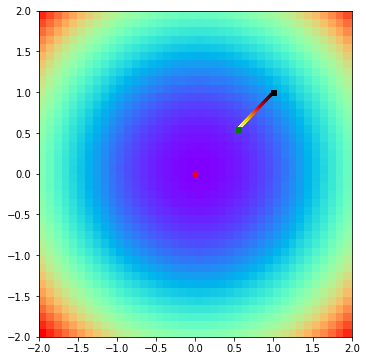

In [9]:
w_store = np.array(algo.wstore)
fig, axes = plt.subplots(1,1, figsize=(6,6))
axes.pcolor(X, Y, Z,cmap=plt.cm.rainbow)
# wの軌跡
axes.plot(w_store.T[0],w_store.T[1],c = "k",alpha=0.2,linewidth = 1)
c = np.linspace(0, _t_max, len(w_store))
axes.scatter(w_store.T[0],w_store.T[1],c=c,cmap = plt.cm.hot ,linewidths=0.01,alpha=1,s=10)

# 始点(黄色)、終点（緑）、真値（赤）
axes.plot(*w_store[0], 'ks', markersize=5,label="start")
axes.plot(*w_store[-1], 'gs', markersize=5,label="finish")
axes.plot(*f.w_star, 'r*', markersize=8,label="true value")


#余白の調整
plt.subplots_adjust(right=0.85)
plt.subplots_adjust(wspace=0.1)

plt.show()

In [11]:
hoge = np.array([1,2,3])
hoge ** hoge

array([ 1,  4, 27])